In [223]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from network_handler import Network_Handler
from network import Network
from person import Person
from disease_propagator import Disease_Propagator
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
# Parameters
## General simulation
number_of_simulations = 50
time_limit = 60

## Network-related
population_size = 10000
average_degree = 6 #Number of initial connections #Distribution
random_edge_probability = 0.35
maximum_contact_number = 1

#unit_time = population_size # number of simulation steps that make up one time step

## Disease-related
time_until_quarantine = {
    'mean': 3,
    'std_dev': 2
}
time_until_recovery = 14
asymptomatic_probability = 0
p = 0 # Factor for probability to become infected in public
p_sd = p / 10
I_0 = 5 #int(population_size * 0.05) # Starting population of infectious individuals
infection_probability = 0.1

## Scenario-related
number_of_daily_contacts_normal = 50
contact_reduction_factor = 0.2
number_of_daily_contacts_social_distancing = int(number_of_daily_contacts_normal * contact_reduction_factor)

Create our networks, first we create a base network, than the random reduction case and finally the triadic strategy case.

In [225]:
population_IDs = range(population_size)

# Network
# Degrees ranging from 3 to 10
# Clustering coefficient: between 0.15 and 0.2 
# Average shortest path length around 6
# -> Typical for social networks [Networks: An Introduction by Newman, my google sheet]

network_base = Network(population_size,average_degree,random_edge_probability)

# Init our networkhandler with the base_network we defined above
network_handler = Network_Handler(network_base)

#network_handler.analyze_network(network_base)

# Reduced network with triadic strategy
network_triadic = network_handler.triadic_strategy()

# Repeating contacts
network_few_contacts = network_handler.repeating_contacts(network_base, maximum_contact_number)

In [226]:
scenarios = {"No restrictions": (network_base, number_of_daily_contacts_normal, p),
             "Social distancing (random)": (network_base, number_of_daily_contacts_social_distancing, p_sd),
             "Social distancing (triadic)": (network_triadic, number_of_daily_contacts_social_distancing, p_sd),
             "Social distancing \n (few contact persons)": (network_few_contacts, number_of_daily_contacts_social_distancing, p_sd)
            }
social_distancing_scenarios = {"Social distancing (random)": (network_base, number_of_daily_contacts_social_distancing),
             "Social distancing (triadic)": (network_triadic, number_of_daily_contacts_social_distancing),
             "Social distancing \n (few contact persons)": (network_few_contacts, number_of_daily_contacts_social_distancing)
            }

 Next we create the object that is responsible for simulating disease transmission on a given network.

In [227]:
disease = Disease_Propagator(time_limit, 
                             time_until_recovery, 
                             time_until_quarantine['mean'], 
                             time_until_quarantine['std_dev'], 
                             asymptomatic_probability,
                             infection_probability
                            )

In [228]:
#Loop over every of our networks... maybe implement that into the network handler
sim_S = []
sim_I = []
for i in range(0,number_of_simulations):
    if i%5 == 0:
        print("Entering simulation round {}.".format(i))
    S_t = []
    I_t = []
    for key in scenarios.keys():
        S, I = disease.simulate(scenarios[key][0], scenarios[key][2], I_0, scenarios[key][1])
        I_t.append(I)
    
    #sim_S.append(S_t.values())
    sim_I.append(I_t)



Entering simulation round 0.
Entering simulation round 5.
Entering simulation round 10.
Entering simulation round 15.
Entering simulation round 20.
Entering simulation round 25.
Entering simulation round 30.
Entering simulation round 35.
Entering simulation round 40.
Entering simulation round 45.


In [229]:
sim_I = np.array(sim_I)

In [230]:
#sim_I.shape

In [231]:
#S_percent_2_5 = np.percentile(np.array(sim_S[:,:,:]) ,2.5,axis=0)
#S_percent_97_5 = np.percentile(np.array(sim_S[:,:,:]) ,97.5,axis=0)
I_percent_2_5 = np.percentile(np.array(sim_I[:,:,:]) ,2.5,axis=0)
I_percent_97_5 = np.percentile(np.array(sim_I[:,:,:]) ,97.5,axis=0)

In [232]:
#I_percent_2_5.shape

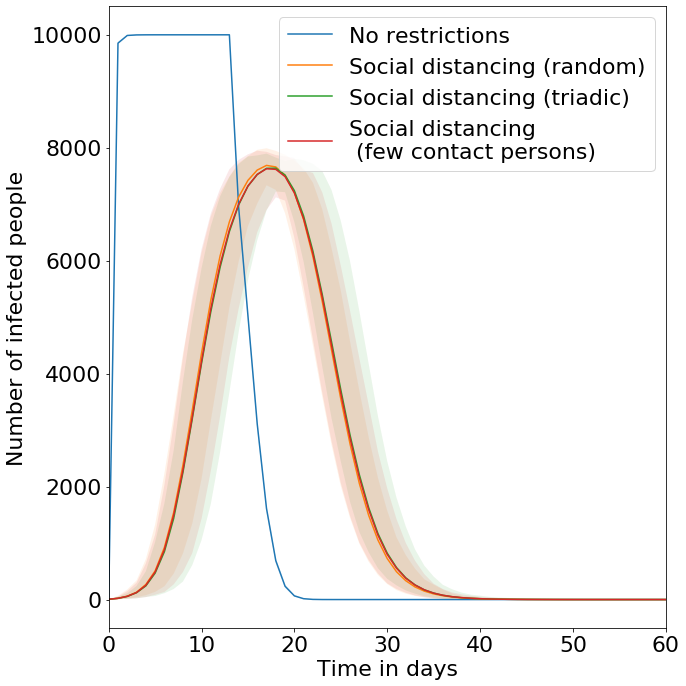

In [233]:
plt.rcParams.update({'font.size': 22})

time_range = np.arange(0, time_limit+1, 1)
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i,key in enumerate(scenarios):
    ax.set_xlabel("Time in days")
    ax.set_ylabel("Number of infected people")
    ax.set_xlim(0,time_limit)
    #ax.set_ylim(0,1000)
    
    ax.fill_between(
        time_range,
        I_percent_2_5[i],
        I_percent_97_5[i],    
        alpha=0.1
    )
    
    ax.plot(
        time_range,
        np.mean(np.array(sim_I[:,i,:]),axis=0),
        label = key
    )
plt.legend()
plt.tight_layout()
figname = "test1" + ".png"
plt.savefig(figname)  


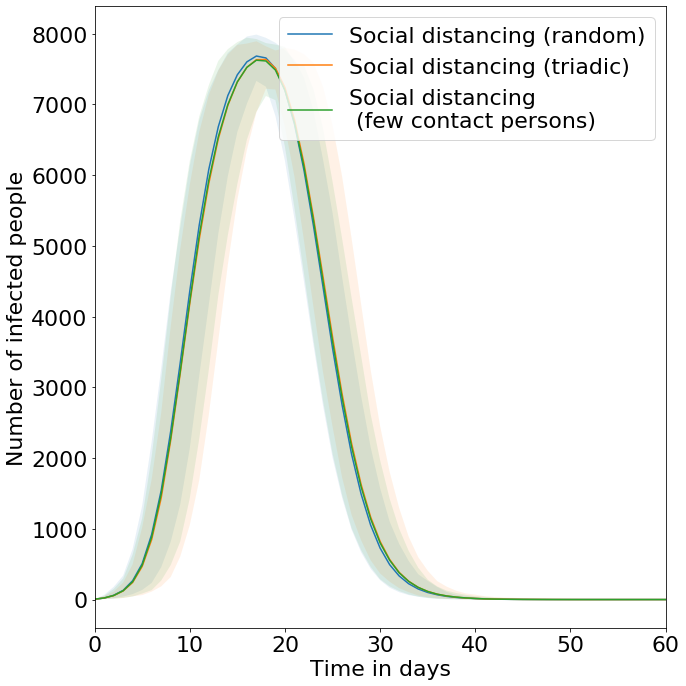

In [234]:
plt.rcParams.update({'font.size': 22})

time_range = np.arange(0, time_limit+1, 1)
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i,key in enumerate(social_distancing_scenarios):
    ax.set_xlabel("Time in days")
    ax.set_ylabel("Number of infected people")
    ax.set_xlim(0,time_limit)
    #ax.set_ylim(0,1000)
    
    ax.fill_between(
        time_range,
        I_percent_2_5[i+1],
        I_percent_97_5[i+1],    
        alpha=0.1
    )
    
    ax.plot(
        time_range,
        np.mean(np.array(sim_I[:,i+1,:]),axis=0),
        label = key
    )
plt.legend()
plt.tight_layout()
figname = "1maxContact" + ".png"
plt.savefig(figname)  